In [6]:
import os
import glob
import sys
from pathlib import Path
    
import seaborn as sns
import matplotlib
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import brainbox
from brainbox import trainer

from fastsnn.datasets import transforms
from fastsnn.datasets.transforms import AddGaussianNoise, SingleSpike2DEncoding, RandomCrop, RandomPerspective
from fastsnn import datasets, models, results

%load_ext autoreload
%autoreload 2

In [12]:
root = Path(os.path.abspath("")).parent.parent

In [13]:
def agg_accuracy(x):
    return f"{np.mean(100*x):.2f}±{np.std(100*x):.2f}"

def agg_summary(x):
    return f"{np.mean(x):.2f}±{np.std(x):.2f}"

# Accuracy

## Yin-Yang

In [14]:
yinyang_dataset = datasets.YinYangDataset(train=False, transform=transforms.List.get_yingyang_transform(100))
yinyang_root = os.path.join(root, "results/datasets/yinyang")
yinyang_query = results.DatasetResultsBuilder(yinyang_root, yinyang_dataset, batch_size=256)

INFO:validator:Computing metric for e2c6e6a589554901add9828f8a56c865...
building layer..
building layer..
INFO:validator:Computing metric for ef228d826a4b4beb80752659e915db72...
building layer..
building layer..
INFO:validator:Computing metric for 3d9fdf9c2e1e492290ea25f515c463e5...
building layer..
single_spike False integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for 0dfc06b987bd4414a5f019f5b7d7f63e...
building layer..
building layer..
INFO:validator:Computing metric for 179a6542877e4b43ae735661e4de6f6b...
building layer..
single_spike True integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for 8241a39a427f4565835edf14d17d7d99...
building layer..
single_spike False integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
INFO:validator:Computin

In [22]:
yinyang_query.results_df.groupby(["method", "beta_requires_grad", "readout_max", "single_spike"]).agg({"accuracy": agg_accuracy, "spike_counts": agg_summary, "duration": agg_summary})

accuracy  \
method     beta_requires_grad readout_max single_spike               
fast_naive True               False       True          98.02±0.16   
standard   True               False       False         98.29±0.14   
                                          True          97.91±0.30   

                                                        spike_counts  \
method     beta_requires_grad readout_max single_spike                 
fast_naive True               False       True            78.11±1.85   
standard   True               False       False         140.05±19.20   
                                          True            79.18±0.90   

                                                          duration  
method     beta_requires_grad readout_max single_spike              
fast_naive True               False       True           1.41±0.02  
standard   True               False       False         15.41±0.19  
                                          True          19.78±0.15

## MNIST

In [19]:
mnist_root = os.path.join(root, "results/datasets/mnist")

In [20]:
# Deep conv models
conv_mnist_dataset = datasets.MNISTDataset(os.path.join(root, "data"), train=False, t_len=8, transform=transforms.List.get_mnist_transform(t_len=8, flatten=False, use_augmentation=False))
conv_mnist_query = results.DatasetResultsBuilder(mnist_root, conv_mnist_dataset, batch_size=256, build_activity=False)

INFO:validator:Computing metric for ec18d49e8e944077a679c4ff66119aa6...
building layer..
building layer..
ERROR:validator:Failed computing metric for ec18d49e8e944077a679c4ff66119aa6: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 5 is not equal to len(dims) = 3
INFO:validator:Computing metric for fdd14c235351412fbef030f1526b5049...
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for d38d5531a8c8436594931d50dc968c85...
INFO:validator:Computing metric for 1a5dbf02e87346168ef196f031e42074...
INFO:validator:Computing metric for d365f2ab6e4746c0a1d1f1079f156041...
building layer..
building layer..
ERROR:validator:Failed computing metric for d365f2ab6e4746c0a1d1f1079f156041: permute(s

INFO:validator:Computing metric for 24e6b19623254d709ec5d3e0927aa873...
INFO:validator:Computing metric for c8eaffaf9ef0441bac8cf23522c58bc0...
building layer..
building layer..
ERROR:validator:Failed computing metric for c8eaffaf9ef0441bac8cf23522c58bc0: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 5 is not equal to len(dims) = 3
INFO:validator:Computing metric for 1bcdc4f604284f918db793cf7116660b...
INFO:validator:Computing metric for de1faff1706d457c926d34bba2341519...
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for 44cbd6fffb4849ee958e9cd19efdf164...
building layer..
building layer..
ERROR:validator:Failed computing metric for 44cbd6fffb4849ee958e9cd19efdf164: permute(s

In [23]:
conv_mnist_query.results_df.groupby(["method", "beta_requires_grad", "readout_max", "single_spike"]).agg({"accuracy": agg_accuracy, "duration": agg_summary})

accuracy    duration
method     beta_requires_grad readout_max single_spike                        
fast_naive False              False       True          99.27±0.04  21.43±0.62
                              True        True          99.29±0.06  19.96±0.44
           True               False       True          99.22±0.06  23.35±0.07
                              True        True          99.34±0.03  23.44±0.02
standard   True               True        False         99.47±0.04  29.44±0.05
                                          True          99.35±0.04  32.35±0.15

In [24]:
# Linear models
linear_mnist_dataset = datasets.MNISTDataset(os.path.join(root, "data"), train=False, t_len=100, transform=transforms.List.get_mnist_transform(t_len=100, flatten=True, use_augmentation=False))
linear_mnist_query = results.DatasetResultsBuilder(mnist_root, linear_mnist_dataset, batch_size=256)

INFO:validator:Computing metric for ec18d49e8e944077a679c4ff66119aa6...
building layer..
building layer..
INFO:validator:Computing metric for fdd14c235351412fbef030f1526b5049...
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike True integrator True
recurrent_source None
ERROR:validator:Failed computing metric for fdd14c235351412fbef030f1526b5049: Expected 4D (unbatched) or 5D (batched) input to conv3d, but got input of size: [256, 788, 104]
INFO:validator:Computing metric for d38d5531a8c8436594931d50dc968c85...
ERROR:validator:Failed computing metric for d38d5531a8c8436594931d50dc968c85: Expected 4D (unbatched) or 5D (batched) input to conv3d, but got input of size: [256, 788, 104]
INFO:validator:Computing metric for 1a5dbf02e87346168ef196f031e42074...
ERROR:validator:Failed computing metric for 1a5dbf02e87346168ef196f031e42074: Expected 4D (unbatched

building layer..
single_spike True integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for ec18d49e8e944077a679c4ff66119aa6...
building layer..
building layer..
INFO:validator:Computing metric for fdd14c235351412fbef030f1526b5049...
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike True integrator True
recurrent_source None
ERROR:validator:Failed computing metric for fdd14c235351412fbef030f1526b5049: forward() got an unexpected keyword argument 'return_all'
INFO:validator:Computing metric for d38d5531a8c8436594931d50dc968c85...
ERROR:validator:Failed computing metric for d38d5531a8c8436594931d50dc968c85: forward() got an unexpected keyword argument 'return_all'
INFO:validator:Computing metric for 1a5dbf02e87346168ef196f031e42074...
ERROR:validator:Failed comput

In [25]:
linear_mnist_query.results_df.groupby(["method", "beta_requires_grad", "readout_max", "single_spike"]).agg({"accuracy": agg_accuracy, "spike_counts": agg_summary, "duration": agg_summary})

accuracy  \
method     beta_requires_grad readout_max single_spike               
fast_naive False              False       True          90.51±0.53   
                              True        True          64.74±0.88   
           True               False       True          97.91±0.08   
                              True        True          97.36±0.02   
standard   True               False       False         98.20±0.21   
                                          True          97.87±0.08   

                                                        spike_counts  \
method     beta_requires_grad readout_max single_spike                 
fast_naive False              False       True           790.05±0.40   
                              True        True          449.46±42.25   
           True               False       True           116.62±5.75   
                              True        True          246.63±14.54   
standard   True               False       False         232.07±69.58   
                                          True          211.76±12.08   

                                                          duration  
method     beta_requires_grad readout_max single_spike              
fast_naive False              False       True          12.45±1.04  
                              True        True          10.64±0.05  
           True               False       True          14.06±0.01  
                              True        True          14.21±0.04  
standard   True               False       False         62.19±0.14  
                                          True          65.05±0.38

## F-MNIST

In [27]:
fmnist_root = os.path.join(root, "results/datasets/fmnist")

In [28]:
# Deep conv models
conv_fmnist_dataset = datasets.FMNISTDataset(os.path.join(root, "data"), train=False, t_len=8, transform=transforms.List.get_fmnist_transform(t_len=8, flatten=False, use_augmentation=False))
conv_fmnist_query = results.DatasetResultsBuilder(fmnist_root, conv_fmnist_dataset, batch_size=256, build_activity=False)

INFO:validator:Computing metric for 16e71fb42be4400a995914d801a75b42...
INFO:validator:Computing metric for 40f9f7a898f243aabecb6714c0eee487...
building layer..
building layer..
ERROR:validator:Failed computing metric for 40f9f7a898f243aabecb6714c0eee487: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 5 is not equal to len(dims) = 3
INFO:validator:Computing metric for dd447052479142d6a79400870c62bae1...
building layer..
building layer..
ERROR:validator:Failed computing metric for dd447052479142d6a79400870c62bae1: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 5 is not equal to len(dims) = 3
INFO:validator:Computing metric for 51b5984e4399472ba4fa361b66447107...
building layer..
building layer..
ERROR:validator:Failed computing metric for 51b5984e4399472ba4fa361b66447107: permute(sparse_coo): n

INFO:validator:Computing metric for 672e11b368fc41c08afa259a8b8c25b0...
INFO:validator:Computing metric for e981f0912bce447a965b6b5d9716ca7a...
building layer..
building layer..
ERROR:validator:Failed computing metric for e981f0912bce447a965b6b5d9716ca7a: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 5 is not equal to len(dims) = 3
INFO:validator:Computing metric for 3a272671b75d454facc4e46864cfec33...
INFO:validator:Computing metric for d8a04365307546009b3f198afed70ec9...
building layer..
single_spike True integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
ERROR:validator:Failed computing metric for d8a04365307546009b3f198afed70ec9: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 5 is not equal to len(dims) = 3
INFO:validator:Comput

In [29]:
conv_fmnist_query.results_df.groupby(["method", "beta_requires_grad", "readout_max", "single_spike"]).agg({"accuracy": agg_accuracy, "duration": agg_summary})

accuracy    duration
method     beta_requires_grad readout_max single_spike                        
fast_naive False              False       True          90.34±0.29  22.53±0.53
                              True        True          90.14±0.08  19.54±0.43
           True               False       True          90.59±0.23  24.11±0.08
                              True        True          90.40±0.15  24.00±0.02
standard   True               False       False         91.17±0.21  29.96±0.68
                                          True          90.81±0.34  33.61±0.12

In [30]:
# Linear models
linear_fmnist_dataset = datasets.FMNISTDataset(os.path.join(root, "data"), train=False, t_len=100, transform=transforms.List.get_fmnist_transform(t_len=100, flatten=True, use_augmentation=False))
linear_fmnist_query = results.DatasetResultsBuilder(fmnist_root, linear_fmnist_dataset, batch_size=256)

INFO:validator:Computing metric for 16e71fb42be4400a995914d801a75b42...
ERROR:validator:Failed computing metric for 16e71fb42be4400a995914d801a75b42: Expected 4D (unbatched) or 5D (batched) input to conv3d, but got input of size: [256, 788, 104]
INFO:validator:Computing metric for 40f9f7a898f243aabecb6714c0eee487...
building layer..
building layer..
INFO:validator:Computing metric for dd447052479142d6a79400870c62bae1...
building layer..
building layer..
INFO:validator:Computing metric for 51b5984e4399472ba4fa361b66447107...
building layer..
building layer..
INFO:validator:Computing metric for c47bf55dfd23415e8bb2e95b23e74da1...
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike True integrator True
recurrent_source None
ERROR:validator:Failed computing metric for c47bf55dfd23415e8bb2e95b23e74da1: Expected 4D (unbatched) or 5D (batched) input to conv3d,

ERROR:validator:Failed computing metric for f885479463404f42a9d35ce0c2ba3671: Expected 4D (unbatched) or 5D (batched) input to conv3d, but got input of size: [256, 788, 104]
INFO:validator:Computing metric for 16e71fb42be4400a995914d801a75b42...
ERROR:validator:Failed computing metric for 16e71fb42be4400a995914d801a75b42: forward() got an unexpected keyword argument 'return_all'
INFO:validator:Computing metric for 40f9f7a898f243aabecb6714c0eee487...
building layer..
building layer..
INFO:validator:Computing metric for dd447052479142d6a79400870c62bae1...
building layer..
building layer..
INFO:validator:Computing metric for 51b5984e4399472ba4fa361b66447107...
building layer..
building layer..
INFO:validator:Computing metric for c47bf55dfd23415e8bb2e95b23e74da1...
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike False integrator False
recurrent_source None
single_spike True integrator True
recurrent_source Non

In [31]:
linear_fmnist_query.results_df.groupby(["method", "beta_requires_grad", "readout_max", "single_spike"]).agg({"accuracy": agg_accuracy, "spike_counts": agg_summary, "duration": agg_summary})

accuracy  \
method     beta_requires_grad readout_max single_spike               
fast_naive False              False       True          85.34±0.14   
                              True        True          53.72±1.37   
           True               False       True          89.05±0.23   
                              True        True          88.28±0.07   
standard   True               False       False         90.88±0.16   
                                          True          89.93±0.25   

                                                        spike_counts  \
method     beta_requires_grad readout_max single_spike                 
fast_naive False              False       True           126.88±3.12   
                              True        True          512.44±54.81   
           True               False       True           244.69±3.64   
                              True        True          622.21±31.18   
standard   True               False       False          517.83±9.58   
                                          True          538.19±12.48   

                                                          duration  
method     beta_requires_grad readout_max single_spike              
fast_naive False              False       True          11.93±0.14  
                              True        True          12.42±0.01  
           True               False       True          16.17±0.05  
                              True        True          16.79±0.82  
standard   True               False       False         65.90±0.17  
                                          True          68.89±0.09

## N-MNIST

In [32]:
nmnist_dataset = datasets.NMNISTDataset(os.path.join(root, "data", "N-MNIST"), train=False, dt=1, transform=transforms.List.get_nmnist_transform(300))
nmnist_root = os.path.join(root, "results/datasets/nmnist")
nmnist_query = results.DatasetResultsBuilder(nmnist_root, nmnist_dataset, batch_size=256)

INFO:validator:Computing metric for 985f929bcc3f4bc6b630368f40df960f...
building layer..
building layer..
INFO:validator:Computing metric for f2c41fa2093d461695b40a0e67573b6b...
building layer..
single_spike True integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for 467cd2d4fb7e447883c0cae5e97e89a1...
building layer..
building layer..
INFO:validator:Computing metric for deb4682885b54ba0aff1d85a6897904c...
building layer..
building layer..
INFO:validator:Computing metric for 78462d0ff483496d84d93710545139b8...
building layer..
building layer..
INFO:validator:Computing metric for 75e006a349324857ac56315603ce94f2...
building layer..
single_spike False integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for 4ac8dd984dc045e582656a17cb32aacd...
building layer..
single_spike False integrator False
recurrent_so

In [33]:
nmnist_query.results_df.groupby(["method", "beta_requires_grad", "readout_max", "single_spike"]).agg({"accuracy": agg_accuracy, "spike_counts": agg_summary, "duration": agg_summary})

accuracy  \
method     beta_requires_grad readout_max single_spike               
fast_naive False              False       True          95.91±0.11   
           True               False       True          96.34±0.16   
standard   True               False       False         97.99±0.06   
                                          True          97.48±0.21   

                                                        spike_counts  \
method     beta_requires_grad readout_max single_spike                 
fast_naive False              False       True           145.98±0.13   
           True               False       True           109.81±2.55   
standard   True               False       False         588.87±36.78   
                                          True          150.95±21.69   

                                                           duration  
method     beta_requires_grad readout_max single_spike               
fast_naive False              False       True           36.29±0.44  
           True               False       True           41.93±0.35  
standard   True               False       False         181.59±0.05  
                                          True          191.91±1.58

## SHD

In [35]:
shd_dataset = datasets.SHDDataset(os.path.join(root, "data", "SHD"), train=False, dt=2, transform=transforms.List.get_shd_transform(500))
shd_root = os.path.join(root, "results/datasets/shd")
shd_query = results.DatasetResultsBuilder(shd_root, shd_dataset, batch_size=256)

INFO:validator:Computing metric for affdd0c38bbd453daafeca8862c76d64...
building layer..
single_spike False integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for e692b322cd1145dbbc599eaab92869fe...
building layer..
single_spike True integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for b08ada6083264b3b922e8ba20f643a1f...
building layer..
building layer..
INFO:validator:Computing metric for 0edc57984f684d31819a4b159349ee4f...
building layer..
building layer..
INFO:validator:Computing metric for fc519a67e85a468d806efdf39ceb4a7d...
building layer..
single_spike True integrator False
recurrent_source None
building layer..
single_spike True integrator True
recurrent_source None
INFO:validator:Computing metric for 9af244b4dbcf4c62b4fdd0d0f76e352a...
building layer..
building layer..
INFO:validator:Computing

In [36]:
shd_query.results_df.groupby(["method", "beta_requires_grad", "readout_max", "single_spike"]).agg({"accuracy": agg_accuracy, "spike_counts": agg_summary, "duration": agg_summary})

accuracy  \
method     beta_requires_grad readout_max single_spike               
fast_naive False              False       True          44.51±2.17   
           True               False       True          70.32±0.25   
standard   True               False       False         70.82±1.67   
                                          True          68.92±0.21   

                                                        spike_counts  \
method     beta_requires_grad readout_max single_spike                 
fast_naive False              False       True           274.46±1.51   
           True               False       True           236.05±0.28   
standard   True               False       False         847.55±41.97   
                                          True           192.03±1.41   

                                                          duration  
method     beta_requires_grad readout_max single_spike              
fast_naive False              False       True           8.69±0.01  
           True               False       True          11.28±0.17  
standard   True               False       False         45.81±0.19  
                                          True          50.12±0.11

# Figure: Robustness, speedup and sparsity

In [37]:
def plot(ax, xlabel, ylabel, title, pad=17, label_size = 20):
    title_size = 20
    line_width = 3
    edge_width = 3
    errwidth = 2
    
    ax.tick_params(axis='both', which='major', pad=5, labelsize=label_size) 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=title_size, pad=pad)
    
    # x-axis
    ax.spines["bottom"].set_linewidth(edge_width)
    ax.xaxis.set_tick_params(width=edge_width)
    ax.set_xlabel(xlabel, fontsize=label_size)
    
    # y-axis
    ax.spines["left"].set_linewidth(edge_width)
    ax.yaxis.set_tick_params(width=edge_width)
    ax.set_ylabel(ylabel, fontsize=label_size)
    
    ax.tick_params(axis='both', which='major', labelsize=16, pad=10)
    
    return ax

def build_query(model_query, method, single_spike=False, readout_max=False):
    assert method in ["fast_naive", "standard"]
    query = (model_query.results_df["method"] == method)
    if method == "standard":
        query &= (model_query.results_df["single_spike"] == single_spike)
    query &= (model_query.results_df["readout_max"] == readout_max)
    query &= (model_query.results_df["beta_requires_grad"] == True)
    
    return query
    
def build_metric_dict(dataset_names, y_list, y_name):
    name_speedup_list = []
    for name, ys in zip(dataset_names, y_list):
        for y in ys:
            name_speedup_list.append({"name": name, y_name: float(y)})
        
    return name_speedup_list

palette = [sns.color_palette("light:b", as_cmap=False)[i] for i in [1, 2, 3, 4, 5]]

## Robustness

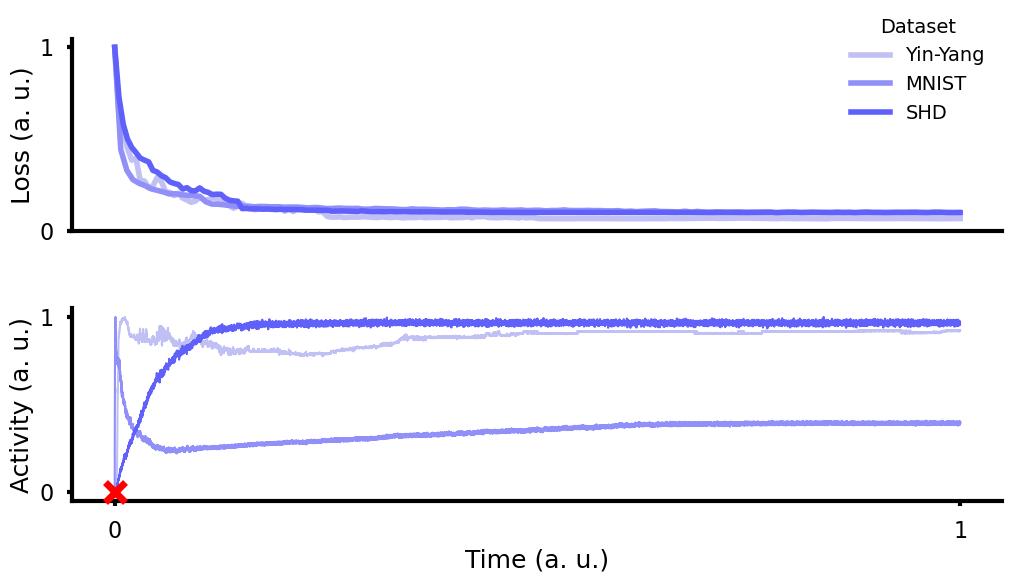

In [38]:
def norm(series):
    series.index /= len(series)
    series /= series.max()
    
    return series

def get_robustness_loss():
    yinyang_loss = pd.read_csv(f"{root}/results/datasets/robustness/yinyang/bc2c7b93c06a4462b6f1ef03d4f646fc/log.csv")["train_loss"]
    mnist_loss = pd.read_csv(f"{root}/results/datasets/robustness/mnist/f4078d9ebdd54263b932b3102c7435eb/log.csv")["train_loss"]
    shd_loss = pd.read_csv(f"{root}/results/datasets/robustness/shd/5025546dd5284fabbec0972b081eb56e/log.csv")["train_loss"]
    
    yinyang_loss = norm(yinyang_loss).rename("Yin-Yang")
    mnist_loss = norm(mnist_loss).rename("MNIST")
    shd_loss = norm(shd_loss).rename("SHD")
    
    return yinyang_loss, mnist_loss, shd_loss

def get_robustness_activity():
    yinyang_activity = pd.read_csv(f"{root}/results/datasets/robustness/yinyang/bc2c7b93c06a4462b6f1ef03d4f646fc/activity.csv")
    mnist_activity = pd.read_csv(f"{root}/results/datasets/robustness/mnist/f4078d9ebdd54263b932b3102c7435eb/activity.csv")
    shd_activity = pd.read_csv(f"{root}/results/datasets/robustness/shd/5025546dd5284fabbec0972b081eb56e/activity.csv")
    
    yinyang_activity = norm(yinyang_activity)
    mnist_activity = norm(mnist_activity)
    shd_activity = norm(shd_activity)
        
    return yinyang_activity, mnist_activity, shd_activity 

yinyang_loss, mnist_loss, shd_loss = get_robustness_loss()
yinyang_activity, mnist_activity, shd_activity = get_robustness_activity()

def plot_robustness(fig, spec):
    spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=spec, hspace=0.4)
    
    # Loss
    ax = plt.Subplot(fig, spec[0])
    fig.add_subplot(ax)
    yinyang_loss, mnist_loss, shd_loss = get_robustness_loss()
    yinyang_loss.plot(ax=ax, linewidth=4, c=palette[0])
    mnist_loss.plot(ax=ax, linewidth=4, c=palette[1])
    shd_loss.plot(ax=ax, linewidth=4, c=palette[2])
    ax.legend(loc="upper right", title="Dataset", fontsize=14, title_fontsize=14, frameon=False, bbox_to_anchor=(1, 1.2))
    ax.set_xticks([])
    ax.set_yticks([0, 1])
    plot(ax, "", "Loss (a. u.)", "", label_size=18)
    
    # Activity
    ax = plt.Subplot(fig, spec[1])
    fig.add_subplot(ax)
    yinyang_activity, mnist_activity, shd_activity = get_robustness_activity()
    yinyang_activity.plot(ax=ax, c=palette[0])
    mnist_activity.plot(ax=ax, c=palette[1])
    shd_activity.plot(ax=ax, c=palette[2])
    ax.legend().set_visible(False)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    plot(ax, "Time (a. u.)", "Activity (a. u.)", "", label_size=18)
    # plt.scatter([0], [0], marker="x", s=200, c="r")
    plt.plot([0], [0], "x", mew=5, ms=15, c="r", clip_on=False, zorder=10)
    
fig = plt.figure(figsize=(12, 6))
fig_spec = gridspec.GridSpec(1, 1, hspace=0.1, wspace=0.1)
plot_robustness(fig, fig_spec[0, 0])

## Speedup

In [39]:
def compute_speedup(query, fast_query, standard_query):
    fast_duration = query.results_df[fast_query]["duration"]
    standard_duration = query.results_df[standard_query]["duration"].mean()
    
    return standard_duration / fast_duration

In [41]:
def compute_speedup_df():
    dataset_names = ["Yin-Yang", "MNIST", "F-MNIST", "N-MNIST", "SHD"]
    model_queries = [yinyang_query, linear_mnist_query, linear_fmnist_query, nmnist_query, shd_query]
    
    speedup_list = []
    for dataset_name, model_query in zip(dataset_names, model_queries):
        fast_query = build_query(model_query, "fast_naive")
        standard_query = build_query(model_query, "standard", single_spike=True)
        speedup_df = compute_speedup(model_query, fast_query, standard_query).rename(dataset_name).reset_index()[dataset_name]
        speedup_list.append(speedup_df)
    
    return pd.DataFrame(build_metric_dict(dataset_names, speedup_list, "speedup"))

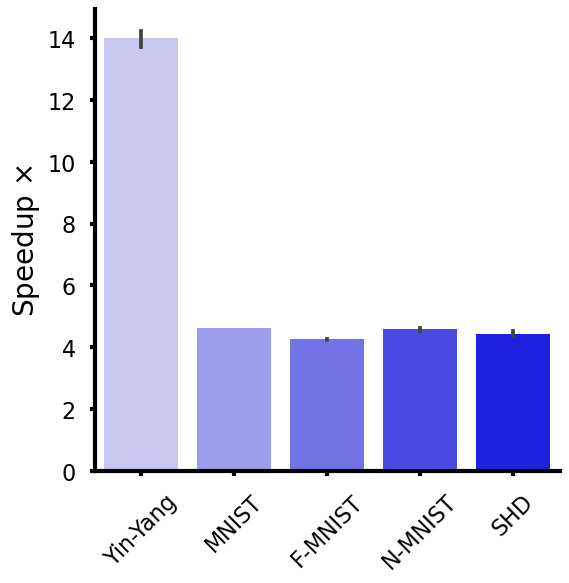

In [42]:
def plot_speedup(speedup_df, fig, spec):
    ax = plt.Subplot(fig, spec)
    fig.add_subplot(ax)
    sns.barplot(data=speedup_df, x="name", y="speedup", palette=palette, ax=ax)
    plot(ax, "", "Speedup $\\times$", "", 15)
    ax.legend().set_visible(False)
    ax.set_xticklabels(["Yin-Yang", "MNIST", "F-MNIST", "N-MNIST", "SHD"], rotation=45, size=16)
    
speedup_df = compute_speedup_df()
    
fig = plt.figure(figsize=(6, 6))
fig_spec = gridspec.GridSpec(1, 1, hspace=0.1, wspace=0.1)
plot_speedup(speedup_df, fig, fig_spec[0, 0])

## Sparsity

In [43]:
def compute_sparsity(query, fast_query, standard_query):
    fast_activity = query.results_df[fast_query]["spike_counts"]
    standard_activity = query.results_df[standard_query]["spike_counts"].mean()
    
    return 1 - fast_activity / standard_activity

In [44]:
def compute_sparsity_df():
    dataset_names = ["Yin-Yang", "MNIST", "F-MNIST", "N-MNIST", "SHD"]
    model_queries = [yinyang_query, linear_mnist_query, linear_fmnist_query, nmnist_query, shd_query]
    
    sparsity_list = []
    for dataset_name, model_query in zip(dataset_names, model_queries):
        fast_query = build_query(model_query, "fast_naive")
        standard_query = build_query(model_query, "standard", single_spike=False)
        sparsity_df = compute_sparsity(model_query, fast_query, standard_query).rename(dataset_name).reset_index()[dataset_name]
        sparsity_list.append(sparsity_df)
        
    return pd.DataFrame(build_metric_dict(dataset_names, sparsity_list, "sparsity"))

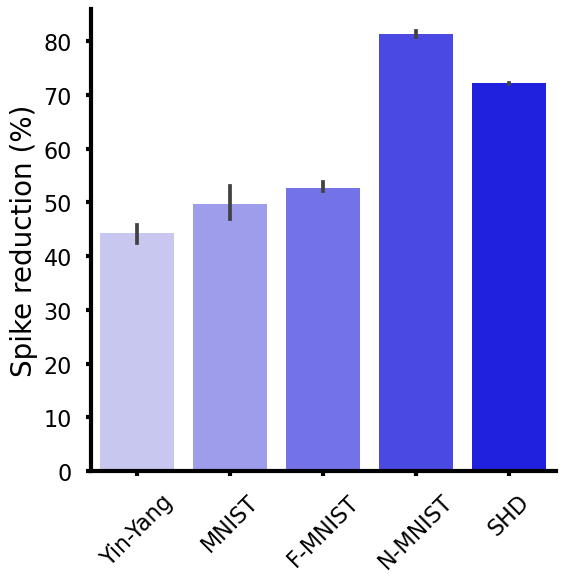

In [45]:
def plot_sparsity(sparsity_df, fig, spec):
    ax = plt.Subplot(fig, spec)
    fig.add_subplot(ax)
    sns.barplot(data=sparsity_df, x="name", y="sparsity", palette=palette, ax=ax)
    plot(ax, "", "Spike reduction (%)", "", 15)
    ax.legend().set_visible(False)
    ax.set_xticklabels(["Yin-Yang", "MNIST", "F-MNIST", "N-MNIST", "SHD"], rotation=45, size=16)
    
sparsity_df = compute_sparsity_df()
sparsity_df["sparsity"] *= 100

fig = plt.figure(figsize=(6, 6))
fig_spec = gridspec.GridSpec(1, 1, hspace=0.1, wspace=0.1)
plot_sparsity(sparsity_df, fig, fig_spec[0, 0])

## Accuracy

In [46]:
def compute_accuracy(query, fast_query, standard_query):
    fast_acc = query.results_df[fast_query]["accuracy"]
    standard_acc = query.results_df[standard_query]["accuracy"].mean()
    
    return 1 - fast_acc / standard_acc

In [47]:
def compute_accuracy_df():
    dataset_names = ["Yin-Yang", "MNIST", "F-MNIST", "N-MNIST", "SHD"]
    model_queries = [yinyang_query, linear_mnist_query, linear_fmnist_query, nmnist_query, shd_query]
    
    acc_list = []
    for dataset_name, model_query in zip(dataset_names, model_queries):
        fast_query = build_query(model_query, "fast_naive")
        standard_query = build_query(model_query, "standard", single_spike=False)
        acc_df = compute_accuracy(model_query, fast_query, standard_query).rename(dataset_name).reset_index()[dataset_name]
        acc_list.append(acc_df)
        
    return pd.DataFrame(build_metric_dict(dataset_names, acc_list, "accuracy"))

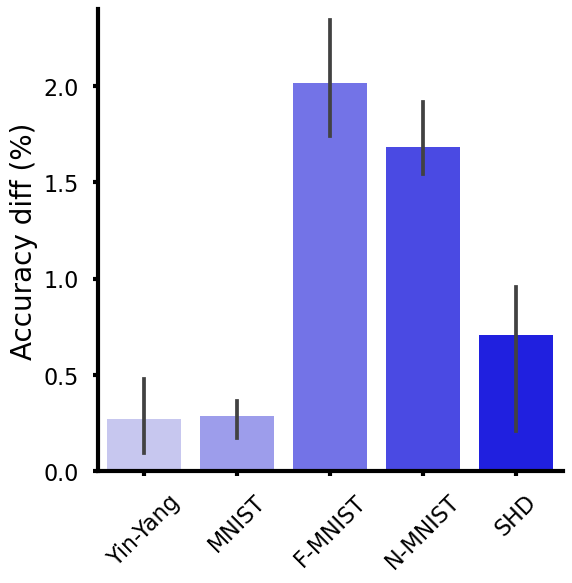

In [48]:
def plot_acc(acc_df, fig, spec):
    ax = plt.Subplot(fig, spec)
    fig.add_subplot(ax)
    sns.barplot(data=acc_df, x="name", y="accuracy", palette=palette, ax=ax)
    plot(ax, "", "Accuracy diff (%)", "", 15)
    ax.legend().set_visible(False)
    ax.set_xticklabels(["Yin-Yang", "MNIST", "F-MNIST", "N-MNIST", "SHD"], rotation=45, size=16)
    ax.set_ylim(0, 2.4)
acc_df = compute_accuracy_df()
acc_df["accuracy"] *= 100

fig = plt.figure(figsize=(6, 6))
fig_spec = gridspec.GridSpec(1, 1, hspace=0.1, wspace=0.1)
plot_acc(acc_df, fig, fig_spec[0, 0])

## Omnipotent plot

In [49]:
def plot_letter(letter, fig_spec, scale=1):
    shift = 0.2
    fontsize = 25
    ax = plt.Subplot(fig, fig_spec)
    ax.text(-shift/scale, 1.2, letter, horizontalalignment="right", verticalalignment="top", transform=ax.transData, fontweight="bold", fontsize=fontsize)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.patch.set_alpha(0)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.add_subplot(ax)

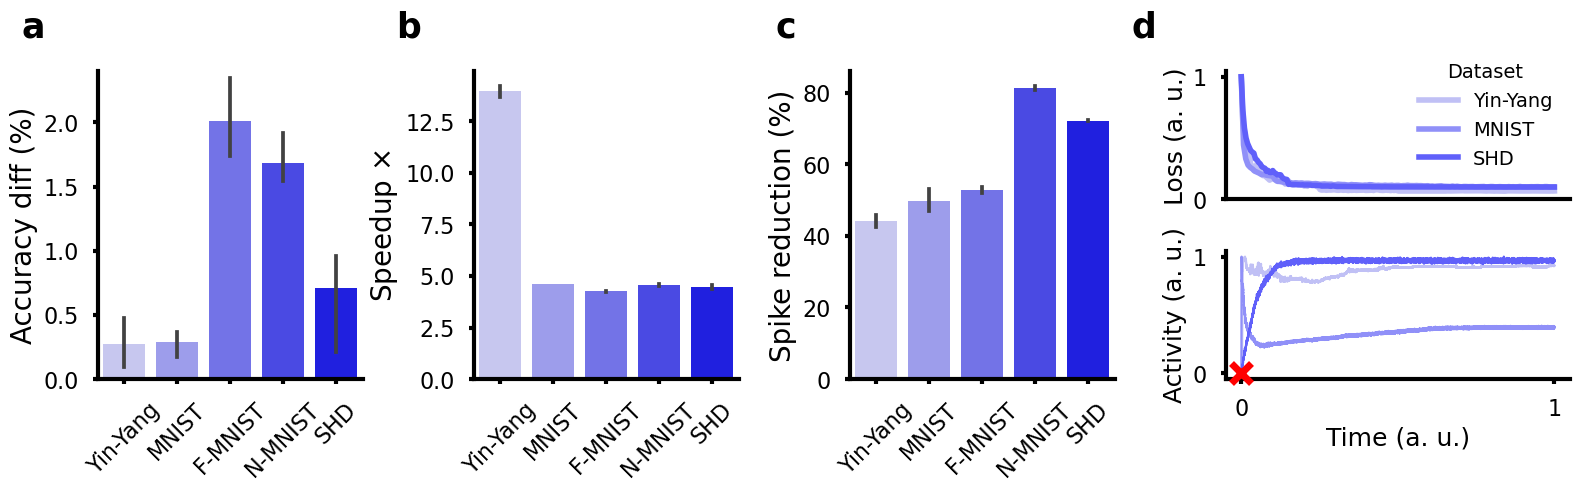

In [50]:
space = 0.65
fig = plt.figure(figsize=(19, 4))
fig_spec = gridspec.GridSpec(1, 4, wspace=0.6*0.65, width_ratios=[1, 1, 1, 1.3])

plot_acc(acc_df, fig, fig_spec[0])
plot_speedup(speedup_df, fig, fig_spec[1])
plot_sparsity(sparsity_df, fig, fig_spec[2])
plot_robustness(fig, fig_spec[3])

plot_letter("a", fig_spec[0])
plot_letter("b", fig_spec[1])
plot_letter("c", fig_spec[2])
plot_letter("d", fig_spec[3])
plt.savefig(f"{root}/figures/figure4.pdf", dpi=300, bbox_inches="tight")